## Text processing & Creating features

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, confusion_matrix

import math
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime


In [2]:
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re
import string
from collections import Counter

import nltk
from nltk.corpus import stopwords
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("fakenews.csv")#, header=None)
pd.set_option("display.max_columns",100)
df.head()

,Unnamed: 0,id,author,date,text,title,source,tag,df
0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Print They should pay all the back all the mon...,Muslims BUSTED: They Stole Millions In Gov’t B...,100percentfedup.com,bias,grafn
1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,reasoning with facts,2016-10-29T08:47:11.259+03:00,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup.com,bias,grafn
2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,Red State : \nFox News Sunday reported this mo...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup.com,bias,grafn
3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,Fed Up,2016-11-01T05:22:00.000+02:00,Email Kayla Mueller was a prisoner and torture...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,100percentfedup.com,bias,grafn
4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,Fed Up,2016-11-01T21:56:00.000+02:00,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,100percentfedup.com,bias,grafn


In [4]:
df.shape

(58105, 9)

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'author', 'date', 'text', 'title', 'source', 'tag', 'df'], dtype='object')

In [6]:
df['text'][1]

'Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! \n100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon. \nSen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initiall

## Delete unnwanted columns

In [7]:
df = df.drop(['Unnamed: 0'], axis = 1) 

In [8]:
df.columns

Index(['id', 'author', 'date', 'text', 'title', 'source', 'tag', 'df'], dtype='object')

In [9]:
df.dtypes

id        object
author    object
date      object
text      object
title     object
source    object
tag       object
df        object
dtype: object

In [10]:
df.shape

(58105, 8)

## Check for nan values

In [12]:
df[df.text.isnull()]

,id,author,date,text,title,source,tag,df
5281,25e2b4c44b767d34b27d11fda418837021d9de85,NaN,2016-11-08T22:33:19.477+02:00,NaN,"Sur Twitter, Donald Trump se félicite d’avoir ...",legorafi.fr,satire,grafn
5282,2d9aab59487c4010589dc8e3c6fb775755dfc4e8,NaN,2016-11-08T22:33:19.889+02:00,NaN,Live Soirée présidentielle US 2016 >> Le Gorafi,legorafi.fr,satire,grafn
5283,eb3c0bd0c345533401fc2b1de39ac990f531e07f,NaN,2016-11-08T23:06:45.440+02:00,NaN,Elections US : les premières estimations donne...,legorafi.fr,satire,grafn
5284,f15a427fd7b5b5e614f20d69812a3536743678e9,NaN,2016-11-09T00:52:02.481+02:00,NaN,Les Américains ne sont plus qu’à quelques heur...,legorafi.fr,satire,grafn
5285,432dccc6a7e8150be01f811640720c27cf9b662a,NaN,2016-11-09T01:16:05.457+02:00,NaN,Donald Trump en 5 dates >> Le Gorafi,legorafi.fr,satire,grafn
5286,6e83015bd16bd0389f728fdc51a4fb28ae247421,NaN,2016-11-09T01:59:43.631+02:00,NaN,Donald Trump s’excuse pour toutes les minorité...,legorafi.fr,satire,grafn
5287,e048b82be1b7602b410bd84fac80ab4ca01fc7ec,NaN,2016-11-09T01:59:44.064+02:00,NaN,Hillary Clinton en 5 dates >> Le Gorafi,legorafi.fr,satire,grafn
5288,3d89bc72db6368a1f6052325c9453f285d04b094,NaN,2016-11-09T03:10:11.975+02:00,NaN,Des millions d’Américains recherchent massivem...,legorafi.fr,satire,grafn
5289,17a5a5704d2d975f184829e87a1bd0d3382c7118,NaN,2016-11-09T04:53:17.790+02:00,NaN,Les gardes-frontières se mettent en alerte pou...,legorafi.fr,satire,grafn
5290,5254804bf0801d8c8cb71b3cadb61349c539d52e,NaN,2016-11-09T04:53:18.186+02:00,NaN,La Russie a profité de l’élection américaine p...,legorafi.fr,satire,grafn


## and deleting them

In [13]:
df = df[df.text.notnull()]

In [14]:
df.reset_index(inplace=True)

In [15]:
df.shape

(58059, 9)

In [16]:
df.text[1]

'Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest! \n100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon. \nSen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initiall

## the text has symbols in it so I am replacing them 

In [18]:
df.text.replace('\n', '')

0        Print They should pay all the back all the mon...
1        Why Did Attorney General Loretta Lynch Plead T...
2        Red State : \nFox News Sunday reported this mo...
3        Email Kayla Mueller was a prisoner and torture...
4        Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...
                               ...                        
58054    28-08-2016 Turkish Bombardment Kills 20 Civili...
58055    17-08-2016 Martyrs as Terrorists Shell Aleppos...
58056    03-08-2016 Chemical Attack Kills Five Syrians ...
58057    01-08-2016 5 Killed as Russian Military Choppe...
58058    April 6 2017 Syrian Army Kills 48 ISIL Terrori...
Name: text, Length: 58059, dtype: object

In [19]:
df.text = df.text.replace('\n',' ', regex=True)

In [20]:
df.text[1]

'Why Did Attorney General Loretta Lynch Plead The Fifth? Barracuda Brigade 2016-10-28 Print The administration is blocking congressional probe into cash payments to Iran. Of course she needs to plead the 5th. She either can’t recall, refuses to answer, or just plain deflects the question. Straight up corruption at its finest!  100percentfedUp.com ; Talk about covering your ass! Loretta Lynch did just that when she plead the Fifth to avoid incriminating herself over payments to Iran…Corrupt to the core! Attorney General Loretta Lynch is declining to comply with an investigation by leading members of Congress about the Obama administration’s secret efforts to send Iran $1.7 billion in cash earlier this year, prompting accusations that Lynch has “pleaded the Fifth” Amendment to avoid incriminating herself over these payments, according to lawmakers and communications exclusively obtained by the Washington Free Beacon.  Sen. Marco Rubio (R., Fla.) and Rep. Mike Pompeo (R., Kan.) initially 

In [21]:
df.head(2)

,index,id,author,date,text,title,source,tag,df
0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Print They should pay all the back all the mon...,Muslims BUSTED: They Stole Millions In Gov’t B...,100percentfedup.com,bias,grafn
1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,reasoning with facts,2016-10-29T08:47:11.259+03:00,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup.com,bias,grafn


## Final cleaning and tokenizing

In [22]:
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [23]:
df['tokenized'] = df['text'].map(lambda x: clean_text(x))

In [24]:
df['tokenized'].head()

0    print they should pay all the back all the mon...
1    why did attorney general loretta lynch plead t...
2    red state fox news sunday reported this mornin...
3    email kayla mueller was a prisoner and torture...
4    email healthcare reform to make america great ...
Name: tokenized, dtype: object

## First feature: Number of words

In [26]:
df['num_wds'] = df['tokenized'].apply(lambda x: len(x.split()))
df['num_wds'].mean()

453.18674107373533

In [27]:
df['num_wds'].max()
df['num_wds'].min()

0

## I am deleting text that's less than 100 words, because the next features need at least 100 words to work.

In [28]:
df = df[df['num_wds'] > 100]
df.reset_index(drop=True, inplace = True)

In [29]:
df.shape

(49604, 11)

## 2 Difficulty FLESCH reading ease 

In [47]:
#!pip3 install py-readability-metrics
#python -m nltk.downloader punkt

In [30]:
from readability import Readability

r = Readability('A NEW TV nanny claims she can sort out problem children in three days – with a   string of controversial methods.   Kathryn Mewes believes in letting children as young as TWO use sharp   knives to build their self-esteem and confidence.   And she says there is no point in children using the word “sorry” until they   are aged at least eight.   Kathryn, 39, says: “You might as well get them to say ‘banana and custard’   when they’re little, because they don’t understand what ‘sorry’ means until   they’ve developed empathy.”   With 20 years’ experience, Kathryn now has a four-part TV show, The Three Day   Nanny, starting on Channel 4 tonight at 8pm.   In it, she replicates what she does in real life – living with a family for 72   hours and teaching the parents how to overcome problems such as poor   sleeping habits, fussy eating and tantrums.   She says: “Three days is proven to be the key amount of time it takes any of   us to get used to a new situation.   “If you think about your third day in a new job, that’s when you start   remembering how to navigate the buildings and remembering people’s names.   “It’s enough time to learn something new.”   Kathryn, who trained with the world-famous Norland College for nannies in   Bath, does not believe in mollycoddling children – and even encourages them   to do dangerous activities including tree climbing and rough-and-tumble   games.   She says: “One of my favourite things to do with children is to make the   kitchen a mess and have a good old cook.   “And I don’t mean baking cakes – I mean with very sharp knives.   “It’s a way of me showing parents the capability of their child chopping up   vegetables and making a beef stew, and it’s quite mind-blowing.”   Kathryn insists she is not scared the youngsters will hurt themselves, even   though she uses professional kitchen knives. “I’m very close at hand, I’m   often holding the handle with them. It’s actually more dangerous to use a   blunt knife.   “Even if they did cut themselves, what’s wrong with that? A little bit of   blood and I’d get them a plaster.”   Kathryn also does not believe in asking them to say “sorry” for their   behaviour – in stark contrast to her Channel 4 predecessor, Supernanny Jo   Frost.   “It’s only my opinion but children realise that ‘sorry’ is a Get Out Of Jail   Free card and they say it without really knowing what it means.   “If they say, ‘Sorreeee’ in a sarcastic voice, you’ve got nowhere to go,   because they’ve done what you asked them to do. It’s not until children are   aged eight that their empathy kicks in.   “I don’t use the word ‘naughty’, either. If you tell a child they are naughty,   they will conform to that stereotype and they will behave in a naughty way.   “Instead of being told they’ve been naughty, I like to give the child a choice   – are you going to steal your brother’s toy and be told off, or are you   going to give that toy back?   “I will give you three chances to give it back but if you don’t, you will be   punished.”   Of the four families who Kathryn helps on the show, all are overcoming their   problems and following her guidelines.   She adds: “I’d be a fool to say that after 72 hours, you have a golden child.   They don’t exist anyway.   “But my research is based on years of experience, and I find that it works.')
f = r.flesch()
print(f.score)
print(f.ease)
print(f.grade_levels)

68.01171659192828
standard
['8', '9']


In [31]:
from readability import Readability
def read(text):
    r = Readability(text)
    f = r.flesch()
    score= f.score
    return round(score)

## After checking that is working I apply the metric to every row in the dataset.

In [32]:
df['difficulty'] = df['text'].apply(read)

In [33]:
df[df['difficulty'] <= 0]

,index,id,author,date,text,title,source,tag,df,tokenized,num_wds,difficulty
58,80,a1a02e00f91bc9152c467c9cf3588fd1074e6a7e,pak alresky,2016-10-28T11:58:00.000+03:00,ASS..WR.WB.SAYA pak alresky TKI BRUNAY DARUSAL...,NaN,abeldanger.net,fake,grafn,asswrwbsaya pak alresky tki brunay darusalam i...,170,-161
73,119,8e945ed1e1c570bda327ccc11fb74679175982d7,IBU SUMIATUNG,2016-10-31T12:28:00.000+02:00,SAYA IBU SUMIATUNG DARI PAPUA SALAH SATU MEMBE...,NaN,abeldanger.net,fake,grafn,saya ibu sumiatung dari papua salah satu membe...,148,-110
116,191,9e574b11f39f12d13054afb7f7074defa568eaee,Jdennis10,2016-10-27T09:42:49.020+03:00,All this time of thoughts and reason Now this ...,Time does nothing,abovetopsecret.com,fake,grafn,all this time of thoughts and reason now this ...,129,-25
132,208,95d9b99598f9eea4ac370e7bbec3ef64c83e15ed,WindCharger,2016-10-27T17:58:32.835+03:00,Shadow Government in South Korea page: 1 archi...,Shadow Government in South Korea,abovetopsecret.com,fake,grafn,shadow government in south korea page 1 archiv...,326,-296
663,938,480cdc40c3355d779effe35e71da44110419b6d0,NaN,2016-10-27T15:12:29.174+03:00,Email In a report published by Turkish newsp...,"Erdoğan: US, the founder of ISIS",awdnews.com,conspiracy,grafn,email in a report published by turkish newspap...,143,-9
...,...,...,...,...,...,...,...,...,...,...,...,...
44053,51541,NaN,NaN,"November 5, 2017",DUBAI (Reuters) - Saudi Arabia detained 11 pri...,"Factbox: Saudi Arabia detains princes, ministe...",NaN,real,isot,dubai reuters saudi arabia detained 11 princes...,188,-63
45614,53448,NaN,NaN,"October 13, 2017",VIENNA (Reuters) - Austria s parliamentary ele...,Factbox: Policies of Austria's main parties in...,NaN,real,isot,vienna reuters austria s parliamentary electio...,645,-5
45824,53702,NaN,NaN,"October 11, 2017",HONG KONG (Reuters) - The following are highli...,Highlights: Hong Kong leader Carrie Lam delive...,NaN,real,isot,hong kong reuters the following are highlights...,409,-39
46558,54570,NaN,NaN,"September 29, 2017",DAR ES SALAAM (Reuters) - Tanzania shut down a...,Tanzania closes third newspaper since June as ...,NaN,real,isot,dar es salaam reuters tanzania shut down anoth...,184,0


In [34]:
df = df[df['difficulty'] > 0]
df.reset_index(drop=True, inplace = True)
df.shape

(48532, 12)

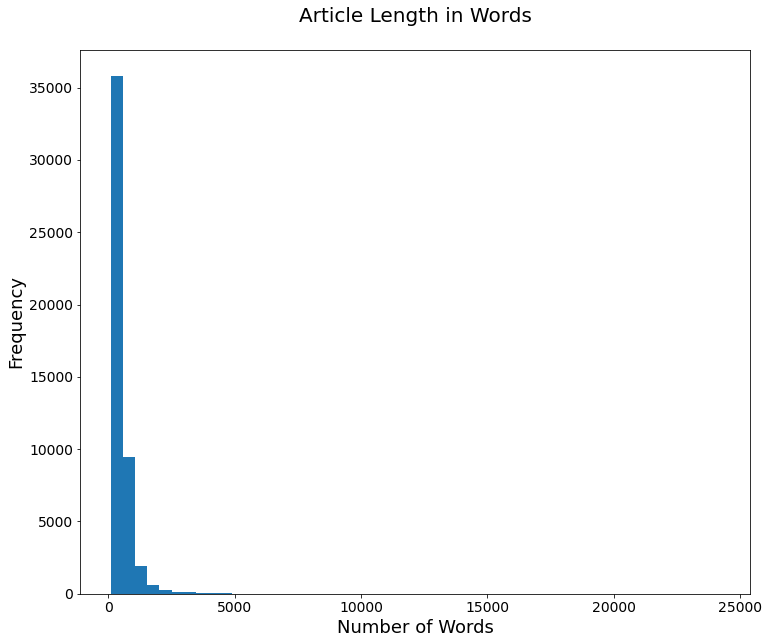

In [35]:
ax=df['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

Operating on the series from the tokenized column that we created earlier, we will invoke the split function from the string library. Then we'll get the set from our series to eliminate duplicate words, then measure the size of the set with len().

Finally, we’ll add the result as a new column that contains the number of unique words in each article.

## 3 Unique words

In [36]:
df['uniq_wds'] = df['tokenized'].str.split().apply(lambda x: len(set(x)))
df['uniq_wds'].head()

0    166
1    146
2    205
3    110
4    415
Name: uniq_wds, dtype: int64

In [37]:
df['uniq_wds'].mean()

259.10803181406084

In [38]:
df['uniq_wds'].min()

50

In [39]:
df['uniq_wds'].max()

4020

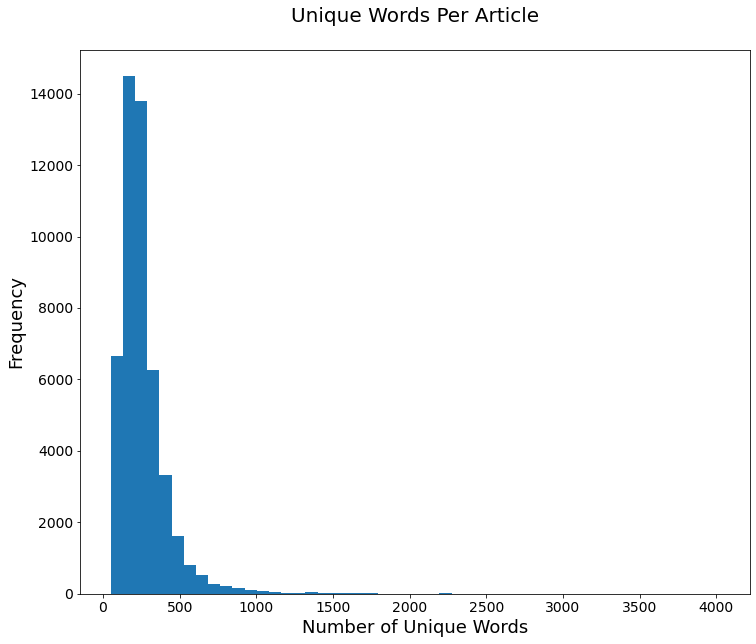

In [40]:
ax=df['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [41]:
wd_counts = Counter()
for i, row in df.iterrows():
    wd_counts.update(row['tokenized'].split())

In [42]:
#stopwords.words('english')

In [43]:
for sw in stopwords.words('english'):
    del wd_counts[sw]

In [44]:
## Looking for the most common words

In [45]:
wd_counts.most_common(20)

[('said', 141182),
 ('trump', 131942),
 ('us', 82711),
 ('would', 70574),
 ('people', 60374),
 ('president', 56574),
 ('one', 53035),
 ('clinton', 43260),
 ('also', 42847),
 ('new', 41547),
 ('state', 39313),
 ('government', 34883),
 ('states', 33959),
 ('like', 33449),
 ('could', 32262),
 ('donald', 31953),
 ('time', 29505),
 ('obama', 29463),
 ('house', 29140),
 ('election', 28449)]

In [46]:
df['num_wds'] = df['tokenized'].apply(lambda x: len(x.split()))

In [47]:
df.head(2)

,index,id,author,date,text,title,source,tag,df,tokenized,num_wds,difficulty,uniq_wds
0,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,reasoning with facts,2016-10-29T08:47:11.259+03:00,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup.com,bias,grafn,why did attorney general loretta lynch plead t...,277,39,166
1,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,Red State : Fox News Sunday reported this mor...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup.com,bias,grafn,red state fox news sunday reported this mornin...,222,44,146


## Stemming

In [48]:
df['tokenized'].head()

0    why did attorney general loretta lynch plead t...
1    red state fox news sunday reported this mornin...
2    email healthcare reform to make america great ...
3    print hillary goes absolutely berserk she expl...
4    breaking nypd ready to make arrests in weiner ...
Name: tokenized, dtype: object

In [49]:
from textblob import Word
df['lemmatized'] = df['tokenized'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['lemmatized'].head()

0    why did attorney general loretta lynch plead t...
1    red state fox news sunday reported this mornin...
2    email healthcare reform to make america great ...
3    print hillary go absolutely berserk she explod...
4    breaking nypd ready to make arrest in weiner c...
Name: lemmatized, dtype: object

## 4 Number of characters

In [50]:
df['char_count'] = df['tokenized'].str.len() ## this also includes spaces
df[['tokenized','char_count']].head()

,tokenized,char_count
0,why did attorney general loretta lynch plead t...,1732
1,red state fox news sunday reported this mornin...,1316
2,email healthcare reform to make america great ...,2053
3,print hillary goes absolutely berserk she expl...,1174
4,breaking nypd ready to make arrests in weiner ...,5630


## 5 Average Word Length

In [51]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['text'].apply(lambda x: avg_word(x))
df[['text','avg_word']].head()

,text,avg_word
0,Why Did Attorney General Loretta Lynch Plead T...,5.447653
1,Red State : Fox News Sunday reported this mor...,5.066964
2,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,5.295181
3,Print Hillary goes absolutely berserk! She exp...,5.836066
4,BREAKING! NYPD Ready To Make Arrests In Weiner...,5.080042


In [52]:
## Ratio of unique words

In [53]:
df['perc_uniq'] = df['uniq_wds'] / df['num_wds']

In [54]:
def averageSentence(sentence):
    words = sentence.split()
    average = sum(len(word) for word in words)/len(words)
    return(average)
    
df['avg_sent'] = df['text'].apply(lambda x: averageSentence(x))
df[['text','avg_sent']].head()

,text,avg_sent
0,Why Did Attorney General Loretta Lynch Plead T...,5.447653
1,Red State : Fox News Sunday reported this mor...,5.066964
2,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,5.295181
3,Print Hillary goes absolutely berserk! She exp...,5.836066
4,BREAKING! NYPD Ready To Make Arrests In Weiner...,5.080042


## 6 Number of stopwords

In [56]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
0,Why Did Attorney General Loretta Lynch Plead T...,100
1,Red State : Fox News Sunday reported this mor...,84
2,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,115
3,Print Hillary goes absolutely berserk! She exp...,46
4,BREAKING! NYPD Ready To Make Arrests In Weiner...,371


## 7 Numbers is general 

In [57]:
df['numbers'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

In [58]:
df.head()

,index,id,author,date,text,title,source,tag,df,tokenized,num_wds,difficulty,uniq_wds,lemmatized,char_count,avg_word,perc_uniq,avg_sent,stopwords,numbers
0,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,reasoning with facts,2016-10-29T08:47:11.259+03:00,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup.com,bias,grafn,why did attorney general loretta lynch plead t...,277,39,166,why did attorney general loretta lynch plead t...,1732,5.447653,0.599278,5.447653,100,1
1,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,Red State : Fox News Sunday reported this mor...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup.com,bias,grafn,red state fox news sunday reported this mornin...,222,44,146,red state fox news sunday reported this mornin...,1316,5.066964,0.657658,5.066964,84,0
2,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,Fed Up,2016-11-01T21:56:00.000+02:00,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,100percentfedup.com,bias,grafn,email healthcare reform to make america great ...,332,43,205,email healthcare reform to make america great ...,2053,5.295181,0.617470,5.295181,115,0
3,5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Print Hillary goes absolutely berserk! She exp...,Hillary Goes Absolutely Berserk On Protester A...,100percentfedup.com,bias,grafn,print hillary goes absolutely berserk she expl...,178,42,110,print hillary go absolutely berserk she explod...,1174,5.836066,0.617978,5.836066,46,3
4,6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,bias,grafn,breaking nypd ready to make arrests in weiner ...,955,47,415,breaking nypd ready to make arrest in weiner c...,5630,5.080042,0.434555,5.080042,371,3


In [59]:
df.tail(100)

,index,id,author,date,text,title,source,tag,df,tokenized,num_wds,difficulty,uniq_wds,lemmatized,char_count,avg_word,perc_uniq,avg_sent,stopwords,numbers
48432,57996,1965495376,NaN,4/15/2017,Death Toll in Blast Targeting Evacuees From Be...,Death Toll in Blast Targeting Evacuees From Be...,sputnik,1,svdc,death toll in blast targeting evacuees from be...,328,50,166,death toll in blast targeting evacuee from bes...,1942,5.006079,0.506098,5.006079,108,12
48433,57997,1965495378,NaN,4/13/2017,13.04.2017) Get short URL Topic Operation to L...,US Coalition Strike Accidentally Kills 18 Kurd...,sputnik,1,svdc,13042017 get short url topic operation to libe...,285,31,150,13042017 get short url topic operation to libe...,1808,5.452962,0.526316,5.452962,69,7
48434,57998,1965495379,NaN,4/9/2017,Syrian Army Eliminates Over 75 Nusra Front Mil...,Syrian Army Eliminates Over 75 Nusra Front Mil...,sputnik,1,svdc,syrian army eliminates over 75 nusra front mil...,234,6,123,syrian army eliminates over 75 nusra front mil...,1501,5.480851,0.525641,5.480851,48,11
48435,57999,1965495380,NaN,4/9/2017,09.04.2017Get short URL 0 85 12 Daesh terroris...,Kurdish-Led Forces Eliminate 12 Daesh Militant...,sputnik,0,svdc,09042017get short url 0 85 12 daesh terrorists...,167,32,107,09042017get short url 0 85 12 daesh terrorist ...,1029,5.269461,0.640719,5.269461,42,5
48436,58000,1965495381,NaN,4/8/2017,08.04.2017(updated 1954 08.04.2017) Get short ...,Civilian Death Toll in US-Led Coalition Airstr...,sputnik,1,svdc,08042017updated 1954 08042017 get short url 0 ...,149,44,99,08042017updated 1954 08042017 get short url 0 ...,917,5.286667,0.664430,5.286667,42,8
48437,58001,1965495382,NaN,4/8/2017,08.04.2017(updated 1456 08.04.2017) Get short ...,At Least 10 Civilians Die in US-Led Coalitions...,sputnik,1,svdc,08042017updated 1456 08042017 get short url 94...,307,37,169,08042017updated 1456 08042017 get short url 94...,1953,5.469256,0.550489,5.469256,82,10
48438,58002,1965495383,NaN,4/7/2017,07.04.2017(updated 1404 07.04.2017) Get short ...,US Missile Strikes on Syrian Airbase Killed Fo...,sputnik,1,svdc,07042017updated 1404 07042017 get short url to...,311,38,167,07042017updated 1404 07042017 get short url to...,1930,5.260317,0.536977,5.260317,75,5
48439,58003,1965495384,NaN,4/7/2017,07.04.2017(updated 1121 07.04.2017) Get short ...,US Missile Strike on Syria Kills Five Injures ...,sputnik,1,svdc,07042017updated 1121 07042017 get short url to...,301,31,147,07042017updated 1121 07042017 get short url to...,1829,5.141914,0.488372,5.141914,81,9
48440,58004,1965495387,NaN,4/6/2017,06.04.2017 The attack in Syrian Idlib province...,At Least 27 Children Killed in Syrian Idlib At...,sputnik,1,svdc,06042017 the attack in syrian idlib province c...,249,34,132,06042017 the attack in syrian idlib province c...,1535,5.253012,0.530120,5.253012,89,9
48441,58005,1965495388,NaN,4/6/2017,Kurdish SDF Troops Kill 13 Daesh Militants Nea...,Kurdish SDF Troops Kill 13 Daesh Militants Nea...,sputnik,1,svdc,kurdish sdf troops kill 13 daesh militants nea...,215,18,124,kurdish sdf troop kill 13 daesh militant near ...,1339,5.305556,0.576744,5.305556,46,6


In [ ]:
#!pip3 install lexical-diversity

## 8 Semantic Complexity
The Measure of Textual
Lexical Diversity (MTLD) is a more complex measure of lexical diversity (McCarthy & Jarvis, 2010).


In [61]:
from lexical_diversity import lex_div as ld

academic_sample = 'In sum, all textual analyses are fraught with difficulty and disagreement, and LD is no exception. There is no agreement in the field as to the form of processing (sequential or nonsequential) or the composition of lexical terms (e.g., words, lemmas, bigrams, etc.); and even a common position with regard to the distinction between the terms lexical diversity, vocabulary diversity, and lexical richness remains unclear (Malvern et al., 2004). In this study, we do not attempt to remedy these issues. Instead, we argue that the field is sufficiently young to be still in need of exploring its potential to inform substantially. Thus, we include in our analyses the most sophisticated indices of LD that are currently available.'

print('Sample MTLD:', ld.mtld(academic_sample.split()))
#print('Sample HD-D:', hdd(academic_sample.split()))

Sample MTLD: 117.0


In [62]:
df['mtld'] = df['lemmatized'].map(lambda x: ld.mtld(x))

In [63]:
df['msttr'] = df['lemmatized'].map(lambda x: ld.msttr(x, window_length=25))


In [64]:
df['hdd'] = df['lemmatized'].map(lambda x: ld.hdd(x))


In [65]:
df.head()

,index,id,author,date,text,title,source,tag,df,tokenized,num_wds,difficulty,uniq_wds,lemmatized,char_count,avg_word,perc_uniq,avg_sent,stopwords,numbers,mtld,msttr,hdd
0,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,reasoning with facts,2016-10-29T08:47:11.259+03:00,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup.com,bias,grafn,why did attorney general loretta lynch plead t...,277,39,166,why did attorney general loretta lynch plead t...,1732,5.447653,0.599278,5.447653,100,1,13.459502,0.545882,0.397903
1,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,Red State : Fox News Sunday reported this mor...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup.com,bias,grafn,red state fox news sunday reported this mornin...,222,44,146,red state fox news sunday reported this mornin...,1316,5.066964,0.657658,5.066964,84,0,12.923091,0.535686,0.382681
2,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,Fed Up,2016-11-01T21:56:00.000+02:00,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,100percentfedup.com,bias,grafn,email healthcare reform to make america great ...,332,43,205,email healthcare reform to make america great ...,2053,5.295181,0.617470,5.295181,115,0,13.212205,0.534500,0.393574
3,5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Print Hillary goes absolutely berserk! She exp...,Hillary Goes Absolutely Berserk On Protester A...,100percentfedup.com,bias,grafn,print hillary goes absolutely berserk she expl...,178,42,110,print hillary go absolutely berserk she explod...,1174,5.836066,0.617978,5.836066,46,3,13.387537,0.541739,0.413866
4,6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,bias,grafn,breaking nypd ready to make arrests in weiner ...,955,47,415,breaking nypd ready to make arrest in weiner c...,5630,5.080042,0.434555,5.080042,371,3,13.120733,0.532613,0.392665


## 9 Capitals in the body of the story

In [66]:
import re

regex = r'\b[A-Z]{5,}\b'

df['caps_body'] = df['text'].str.findall(regex)
df['caps_body'] =df['caps_body'].str.len()

In [67]:
df.head()

,index,id,author,date,text,title,source,tag,df,tokenized,num_wds,difficulty,uniq_wds,lemmatized,char_count,avg_word,perc_uniq,avg_sent,stopwords,numbers,mtld,msttr,hdd,caps_body
0,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,reasoning with facts,2016-10-29T08:47:11.259+03:00,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...,100percentfedup.com,bias,grafn,why did attorney general loretta lynch plead t...,277,39,166,why did attorney general loretta lynch plead t...,1732,5.447653,0.599278,5.447653,100,1,13.459502,0.545882,0.397903,0
1,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,Red State : Fox News Sunday reported this mor...,BREAKING: Weiner Cooperating With FBI On Hilla...,100percentfedup.com,bias,grafn,red state fox news sunday reported this mornin...,222,44,146,red state fox news sunday reported this mornin...,1316,5.066964,0.657658,5.066964,84,0,12.923091,0.535686,0.382681,0
2,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,Fed Up,2016-11-01T21:56:00.000+02:00,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,100percentfedup.com,bias,grafn,email healthcare reform to make america great ...,332,43,205,email healthcare reform to make america great ...,2053,5.295181,0.617470,5.295181,115,0,13.212205,0.534500,0.393574,6
3,5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,Print Hillary goes absolutely berserk! She exp...,Hillary Goes Absolutely Berserk On Protester A...,100percentfedup.com,bias,grafn,print hillary goes absolutely berserk she expl...,178,42,110,print hillary go absolutely berserk she explod...,1174,5.836066,0.617978,5.836066,46,3,13.387537,0.541739,0.413866,0
4,6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,Fed Up,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,100percentfedup.com,bias,grafn,breaking nypd ready to make arrests in weiner ...,955,47,415,breaking nypd ready to make arrest in weiner c...,5630,5.080042,0.434555,5.080042,371,3,13.120733,0.532613,0.392665,1


In [68]:
df.to_csv("fakenews1.csv", index = False)